# Predicting Customer Churn in the Credit Card Industry

## Load and Preview Raw Data

In [5]:
import pandas as pd
raw_df = pd.read_csv("../data/Credit_Card_Customers_Raw.csv")  # Replace with the actual path to your file
raw_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Checking Raw Dataset Info and Summary Statistics

In [6]:
# Raw Dataset Info
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [7]:
# Raw Dataset Summary Statistics
raw_df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


## Drop Columns and Clean Data

In [8]:
raw_df.drop(columns=[
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
], inplace=True)

edu_map = {'Uneducated': 0, 'High School': 1, 'College': 2, 'Graduate': 3, 'Post-Graduate': 4, 'Doctorate': 5, 'Unknown': -1}
marital_map = {'Single': 0, 'Married': 1, 'Divorced': 2, 'Unknown': -1}
income_map = {'Less than $40K': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, '$120K +': 4, 'Unknown': -1}
card_map = {'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3}
gender_map = {'M': 1, 'F': 0}

raw_df['Education_Level'] = raw_df['Education_Level'].map(edu_map)
raw_df['Marital_Status'] = raw_df['Marital_Status'].map(marital_map)
raw_df['Income_Category'] = raw_df['Income_Category'].map(income_map)
raw_df['Card_Category'] = raw_df['Card_Category'].map(card_map)
raw_df['Gender'] = raw_df['Gender'].map(gender_map)
raw_df['Churn'] = raw_df['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})
raw_df.drop(columns=['Attrition_Flag'], inplace=True)
df = raw_df.copy()

## Checking Clean Dataset Info and Summary Statistics

In [9]:
# Cleaned Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [10]:
# Cleaned Summary Statistics
df.describe()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,0.470919,2.346203,1.601955,0.536585,1.085711,0.083638,35.928409,3.812580,...,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.839340
std,3.690378e+07,8.016814,0.499178,1.298908,1.700417,0.737808,1.474639,0.333784,7.986416,1.554408,...,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.367235
min,7.080821e+08,26.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,13.000000,1.000000,...,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.000000,3.000000,...,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,1.000000
50%,7.179264e+08,46.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,36.000000,4.000000,...,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,1.000000
75%,7.731435e+08,52.000000,1.000000,3.000000,3.000000,1.000000,2.000000,0.000000,40.000000,5.000000,...,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,1.000000
max,8.283431e+08,73.000000,1.000000,5.000000,5.000000,2.000000,4.000000,3.000000,56.000000,6.000000,...,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,1.000000


## Save Cleaned Dataset

In [11]:
df.to_csv('../data/Credit_Card_Customers_Cleaned.csv', index=False)

## EDA: Churn Distribution

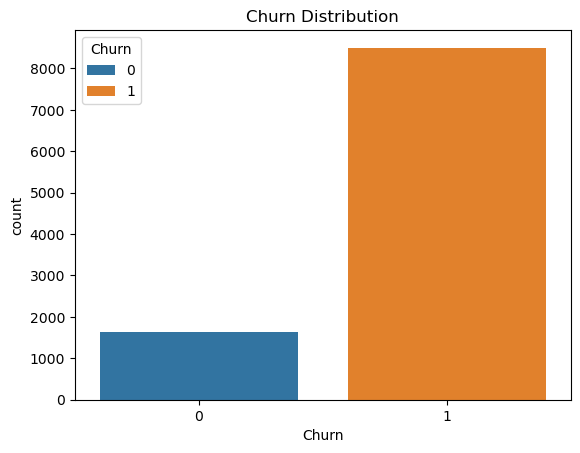

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Churn', hue='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

## EDA: Gender vs Churn

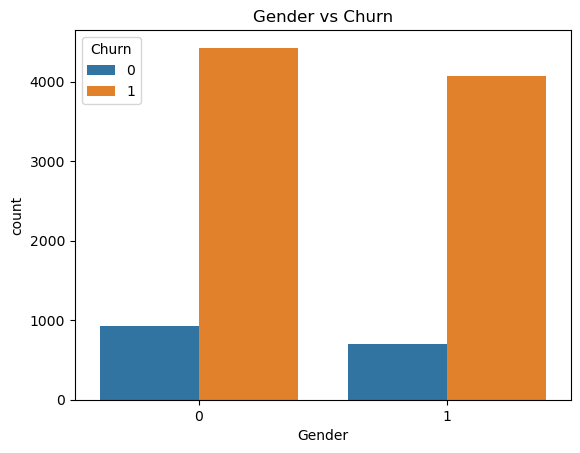

In [13]:
sns.countplot(x='Gender', hue='Churn', data=df)
plt.title('Gender vs Churn')
plt.show()

## EDA: Education Level vs Churn

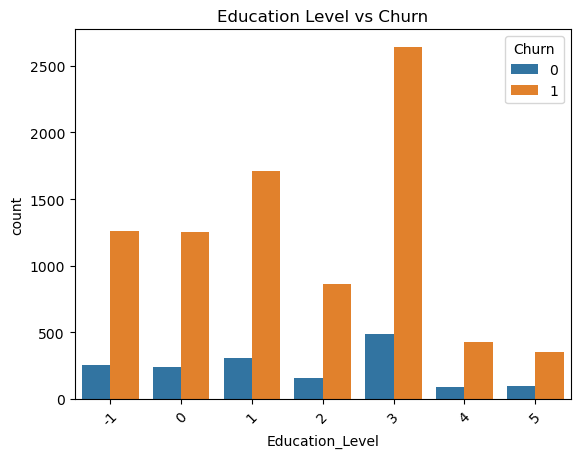

In [14]:
sns.countplot(x='Education_Level', hue='Churn', data=df)
plt.title('Education Level vs Churn')
plt.xticks(rotation=45)
plt.show()

## EDA: Customer Age Distribution by Churn

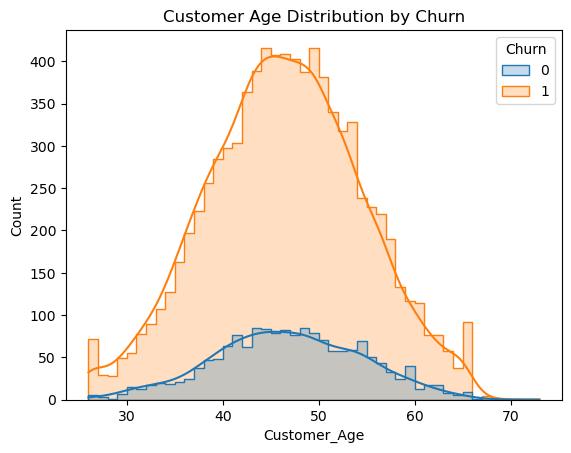

In [15]:
sns.histplot(data=df, x='Customer_Age', hue='Churn', kde=True, element='step')
plt.title('Customer Age Distribution by Churn')
plt.show()

## Upload to AWS RDS

In [16]:
# Import required libraries
import pandas as pd
from sqlalchemy import create_engine, text
import getpass

# Step 1: Get AWS RDS credentials
db_user = 'postgres'
db_password = getpass.getpass("Enter your RDS password: ")
db_host = 'churndb.c9y8o80emv53.us-east-2.rds.amazonaws.com'
db_port = '5432'
db_name = 'churndb'

# Step 2: Connect to default 'postgres' database (required to create another database)
default_conn_string = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/postgres?sslmode=require"
default_engine = create_engine(default_conn_string)

# Step 3: Create 'churndb' if it doesn't exist
with default_engine.connect() as conn:
    conn.execution_options(isolation_level="AUTOCOMMIT").execute(
        text(f"SELECT 1 FROM pg_database WHERE datname = '{db_name}'")
    )
    result = conn.execute(text(f"SELECT 1 FROM pg_database WHERE datname = '{db_name}'")).fetchone()
    if not result:
        conn.execute(text(f"CREATE DATABASE {db_name}"))
        print(f"Database '{db_name}' created successfully.")
    else:
        print(f"Database '{db_name}' already exists.")

# Step 4: Connect to 'churndb' database
final_conn_string = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}?sslmode=require"
engine = create_engine(final_conn_string)

# Step 5: Upload your DataFrame to the new DB
# Replace `df` with your cleaned DataFrame
df.to_sql('churn_customers', engine, index=False, if_exists='replace')
print("Cleaned DataFrame uploaded to 'churn_customers' table in AWS RDS!")


Database 'churndb' already exists.
Cleaned DataFrame uploaded to 'churn_customers' table in AWS RDS!


## Load All Data for Modeling (From AWS)

In [17]:
query = "SELECT * FROM churn_customers"
df = pd.read_sql(query, con=engine)
df.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn
0,768805383,45,1,3,1,1,2,0,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,818770008,49,0,5,3,0,0,0,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,713982108,51,1,3,3,1,3,0,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,769911858,40,0,4,1,-1,0,0,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,709106358,40,1,3,0,1,2,0,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1


## Train-Test Split and GridSearchCV Optimization

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df.drop(columns=['Churn'])
y = df['Churn']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

param_grid = {'max_depth': [5, 10, 15], 'n_estimators': [50, 100, 150]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       325
           1       0.97      0.99      0.98      1701

    accuracy                           0.96      2026
   macro avg       0.94      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026

Accuracy: 0.9624876604146101
Confusion Matrix:
 [[ 274   51]
 [  25 1676]]
